# Augmented Judgement

Illustrative examples for how different approaches to Machine Learning work on different types of data sets, both those manufactured for illustration, and others from natural online contexts.

In [1]:
import ai #Our library where all the messy magic lies

import matplotlib.pyplot as plt #Library for graphics
import seaborn #Library to make the graphics look slicker
%matplotlib inline

#Libraries for storing and manipulating our data
import numpy as np
import pandas

#Library where the machine learning algorithims reside, install as scikit-learn
import sklearn

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise or randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [2]:
noise = .2

#dfTrain, dfTest = ai.trainTestSplit(ai.random())
#dfTrain, dfTest = ai.trainTestSplit(ai.andSplit(noise))
#dfTrain, dfTest = ai.trainTestSplit(ai.xorSplit(noise))
dfTrain, dfTest = ai.trainTestSplit(ai.targetSplit(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

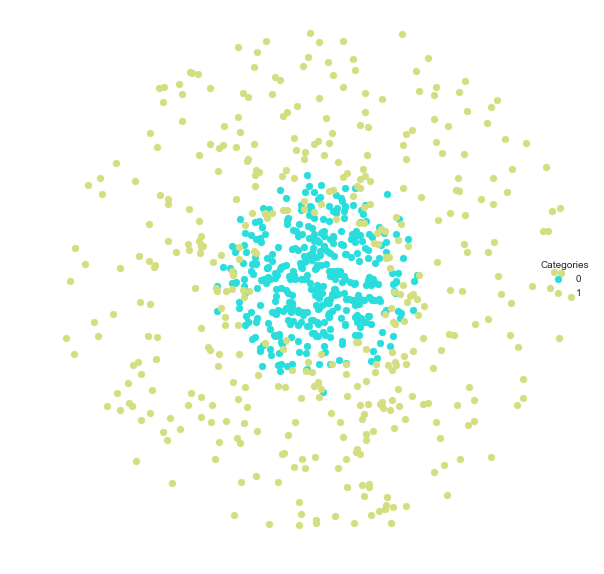

In [3]:
ai.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [4]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [5]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Algorithm evaluation

We can look at few measurements of it's performance, by using the testing set

In [6]:
ai.evaluateClassifier(clf, dfTest)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
0,0.884615,0.917473,0.115,0.885714,0.894231
1,0.884615,0.909605,0.115,0.884211,0.875000


This lets us look at which classes do better

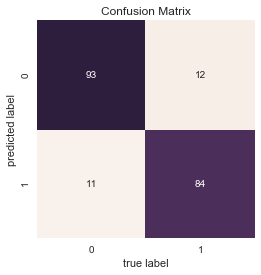

In [7]:
ai.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better

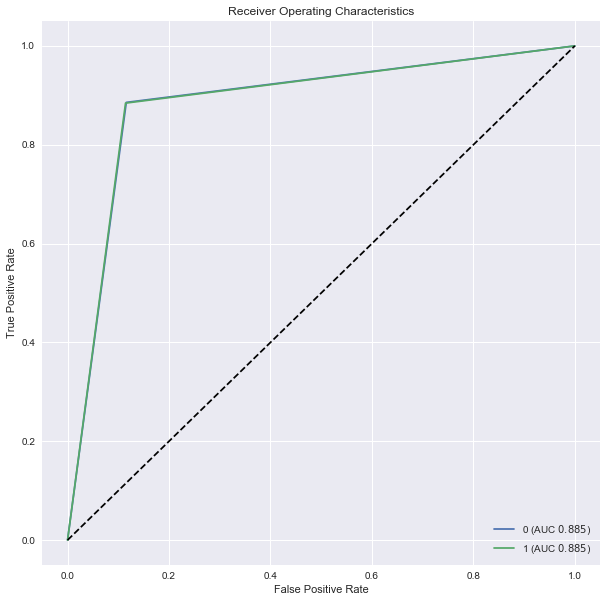

In [8]:
ai.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other.

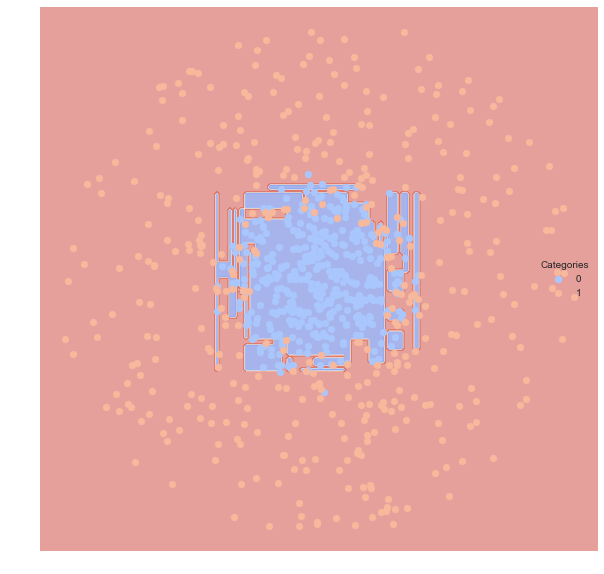

In [10]:
ai.plotregions(dfTrain, clf)

## Now we do the same for real data

Optional data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator
+ emails classified as Spam or Ham

In [11]:
dfTrain, dfTest = ai.trainTestSplit(ai.loadReddit())
#dfTrain, dfTest = ai.trainTestSplit(ai.loadNewsGroups())
#dfTrain, dfTest = ai.trainTestSplit(ai.loadSenateLarge())
#dfTrain, dfTest = ai.trainTestSplit(ai.loadSenateSmall())
#dfTrain, dfTest = ai.trainTestSplit(ai.loadSpam())

Loading Reddit data
Converting to vectors


In [12]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [13]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [14]:
ai.evaluateClassifier(clf, dfTest)

,AUC,Average_Precision,Error_Rate,Precision,Recall
Category,,,,,
Relationships,0.968832,0.961326,0.025078,0.955056,0.955056
Weeaboo Tales,0.992308,0.993875,0.003135,1.000000,0.984615
Bad Roommates,0.977682,0.961071,0.018809,0.944444,0.971429
Tales From Tech Support,0.979746,0.978274,0.015674,0.978723,0.968421


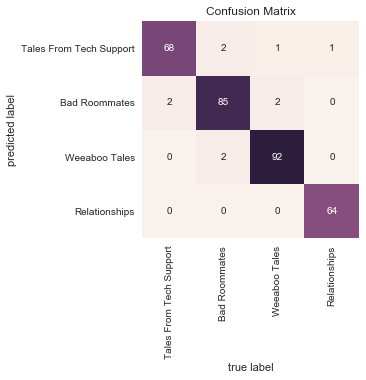

In [15]:
ai.plotConfusionMatrix(clf, dfTest)

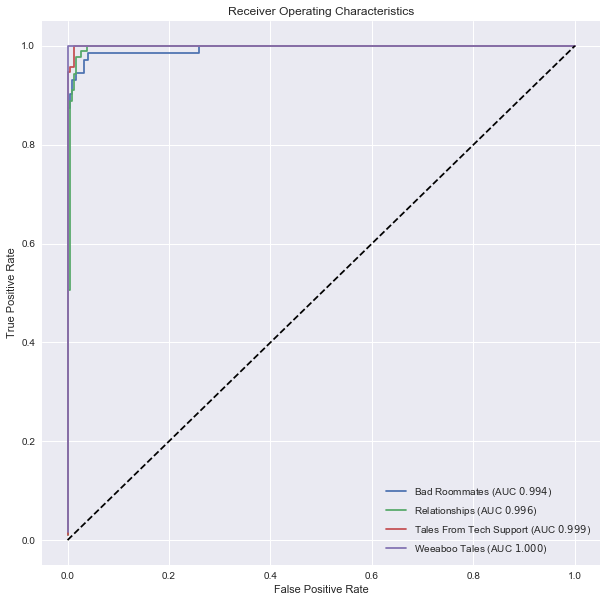

In [16]:
ai.plotMultiROC(clf, dfTest)

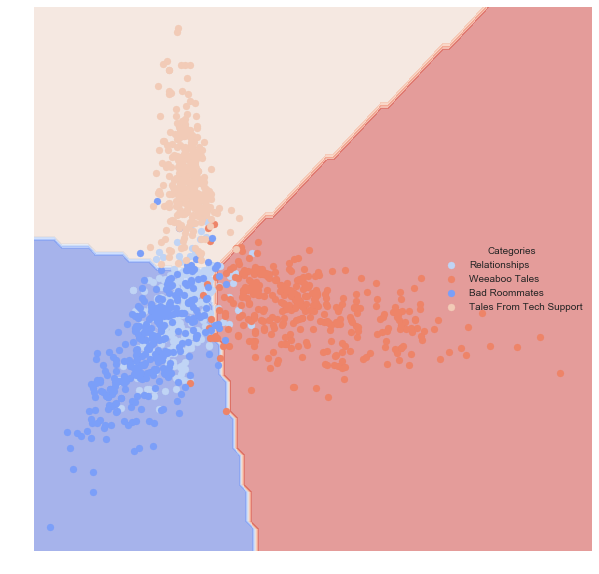

In [17]:
ai.plotregions(dfTrain, clf)

## Multiple simultaneous ML evaluations

In [17]:
models = [#Some of these take a long time to train
          sklearn.naive_bayes.GaussianNB(),
          sklearn.svm.SVC(kernel = 'linear', probability = True),
          sklearn.linear_model.LogisticRegression(),
          #sklearn.tree.DecisionTreeClassifier(),
          #sklearn.neural_network.MLPClassifier(),
          #sklearn.ensemble.GradientBoostingClassifier(),
         ]

ai.compareModels(dfTrain, dfTest, models)

,AUC-Bad Roommates,AUC-Relationships,AUC-Tales From Tech Support,AUC-Weeaboo Tales,Error_Rate
Model,,,,,
GaussianNB,0.828251,0.803519,0.932011,0.822848,0.247649
SVC,0.973208,0.975990,0.987013,0.995652,0.025078
LogisticRegression,0.973208,0.969289,0.987013,0.993506,0.028213
